In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from help_functions.prepare_data import most_recent_thursday
from help_functions.evaluate_daxmodels import evaluate_different_daxmodels, evaluate_daxmodel

from dax.help_functions.get_dax_data import get_data
from dax.help_functions.compute_return import compute_return_h
from dax.models.dax_model1 import get_dax_forecasts_model1

### Import data and estimate quantile forecasts

In [2]:
dax_df = get_data()
for i in range(5):
    dax_df["ret"+str(i+1)] = compute_return_h(dax_df["Close"].values, h=i+1)
start_date_excl = most_recent_thursday(dax_df)
dax_df_cval = dax_df.loc[(dax_df.index >= dax_df.index[8062])
                         & (dax_df.index < start_date_excl)]

In [9]:
#check if functions work 
model = {
    'name': 'model1',
    'function': get_dax_forecasts_model1
}
models = [model]

evaluation1 = evaluate_daxmodel(model, dax_df_cval, last_x=10, weeks=True)
evaluation2 = evaluate_different_daxmodels(
    models, dax_df_cval, last_x=10, weeks=True)

Iteration 2 of 10
                          forecast_date target horizon    q0.025     q0.25  \
2023-11-02 00:00:00+01:00    2023-11-14    DAX   1 day -3.321265 -0.552847   
2023-11-03 00:00:00+01:00    2023-11-14    DAX   2 day -4.087895 -0.841169   
2023-11-06 00:00:00+01:00    2023-11-14    DAX   5 day -5.259161 -0.926504   
2023-11-07 00:00:00+01:00    2023-11-14    DAX   6 day -6.282629 -1.055648   
2023-11-08 00:00:00+01:00    2023-11-14    DAX   7 day -6.735742 -1.094754   

                               q0.5     q0.75    q0.975  
2023-11-02 00:00:00+01:00  0.053786  0.715600  2.719772  
2023-11-03 00:00:00+01:00  0.072355  0.974313  3.570492  
2023-11-06 00:00:00+01:00  0.133010  1.190190  4.628697  
2023-11-07 00:00:00+01:00  0.173880  1.426209  5.367396  
2023-11-08 00:00:00+01:00  0.300695  1.513585  6.259934  
Iteration 3 of 10
                          forecast_date target horizon    q0.025     q0.25  \
2023-10-26 00:00:00+02:00    2023-11-14    DAX   1 day -3.322728 -0.5

[{'name': 'model1',
  'function': <function dax.models.dax_model1.get_dax_forecasts_model1(daxdata=Empty DataFrame
Columns: []
Index: [], last_t=1000)>,
  'evaluation':                           forecast_date target horizon    q0.025     q0.25  \
  2023-11-02 00:00:00+01:00    2023-11-14    DAX   1 day -3.321265 -0.552847   
  2023-11-03 00:00:00+01:00    2023-11-14    DAX   2 day -4.087895 -0.841169   
  2023-11-06 00:00:00+01:00    2023-11-14    DAX   5 day -5.259161 -0.926504   
  2023-11-07 00:00:00+01:00    2023-11-14    DAX   6 day -6.282629 -1.055648   
  2023-11-08 00:00:00+01:00    2023-11-14    DAX   7 day -6.735742 -1.094754   
  2023-10-26 00:00:00+02:00    2023-11-14    DAX   1 day -3.322728 -0.554004   
  2023-10-27 00:00:00+02:00    2023-11-14    DAX   2 day -4.103255 -0.832069   
  2023-10-30 00:00:00+01:00    2023-11-14    DAX   5 day -5.261140 -0.924894   
  2023-10-31 00:00:00+01:00    2023-11-14    DAX   6 day -6.295014 -1.056946   
  2023-11-01 00:00:00+01:00    20

### Visualize evaluation results

In [10]:
horizons = ['1 day', '2 day', '5 day', '6 day', '7 day']
scores = []
names = []
for h in horizons:
    for m in models:
        col_name = f'{m["name"]}: {h}'
        scores.append(m['evaluation']['score']
                      [m['evaluation']['horizon'] == h])
        names.append(col_name)

score_df = pd.concat(scores, axis=1, keys=names)

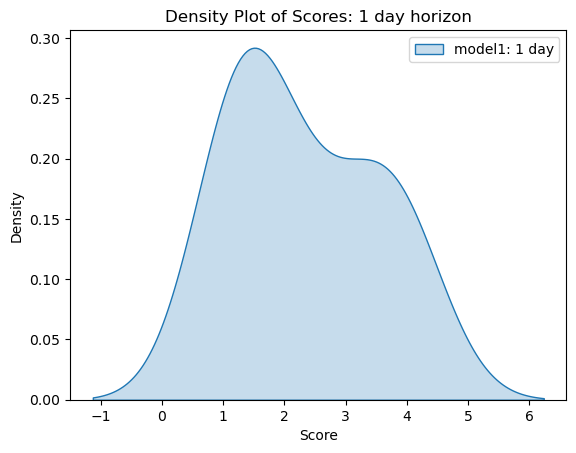

In [12]:
sns.kdeplot(data=score_df.loc[:, ['model1: 1 day']], fill=True)

# Adding labels and title
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Density Plot of Scores: 1 day horizon')

# Display the plot
plt.show()